<a href="https://colab.research.google.com/github/RicardoPerez04/2018947_RAPI/blob/main/Actividades/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Actividad 6: Redes neuronales. Ricardo Abraham Pérez Ibarra. Matrícula: 2018947. Hora: N4

In [2]:
#Librerias
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
#Cargar datos
tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 44s 27ms/step - loss: 0.1664 - accuracy: 0.9488 - val_loss: 0.0725 - val_accuracy: 0.9793
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 3/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0384 - val_accuracy: 0.9896
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.0459 - val_accuracy: 0.9871
Epoch 5/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 6/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 7/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0415 - val_accura

313/313 - 5s - loss: 0.0376 - accuracy: 0.9909 - 5s/epoch - 16ms/step


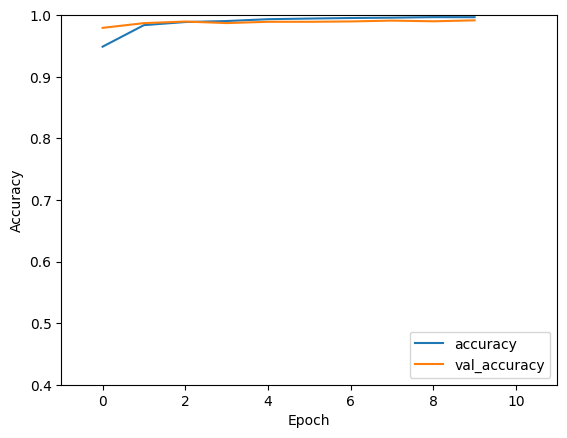

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [11]:
predictions = model.predict(x_test)


313/313 [==============================] - 2s 7ms/step


In [12]:
x = predictions[1]
y = y_test[1]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [1.2318113e-09 2.1392366e-10 9.9999994e-01 3.2159922e-16 3.6298093e-16
 1.3561989e-18 8.6653727e-17 1.8409378e-15 1.9147087e-17 5.1899819e-19] y la clase verdadera es:  2


In [13]:
x = predictions[50]
y = y_test[50]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [1.0236056e-09 2.4392261e-12 9.3927734e-14 2.0203195e-12 9.5139495e-12
 5.2273663e-07 9.9999946e-01 1.1870027e-16 1.0620513e-09 2.5363600e-12] y la clase verdadera es:  6


In [14]:
x = predictions[100]
y = y_test[100]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [1.1362773e-10 1.7855831e-11 6.4998617e-19 2.5553694e-15 1.3041169e-12
 1.1346327e-06 9.9999875e-01 2.6501990e-15 5.3926613e-10 4.3127248e-14] y la clase verdadera es:  6


In [15]:
x = predictions[1000]
y = y_test[1000]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [2.3953192e-14 2.2959104e-14 9.5158985e-15 2.5284758e-10 1.1220114e-09
 2.4289415e-10 4.5028068e-20 1.7713325e-10 6.9693249e-12 9.9999994e-01] y la clase verdadera es:  9


In [16]:
x = predictions[1500]
y = y_test[1500]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [9.5768519e-07 1.1398850e-01 9.7547369e-03 2.8675045e-03 4.1541239e-06
 1.1045034e-07 7.3140806e-11 8.6864918e-01 6.3197189e-07 4.7341203e-03] y la clase verdadera es:  7


**¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?**

Use 10 epocas, las mismas que en la actividad pasada, sin embargo tuve un mucho mejor resultado

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**

Sí, debido a que el proceso de convolucion fue de mucha ayuda para podernos acercar mas rapido a la efectividad del 100%